In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import re

In [10]:
df = pd.read_csv('data_02.csv')


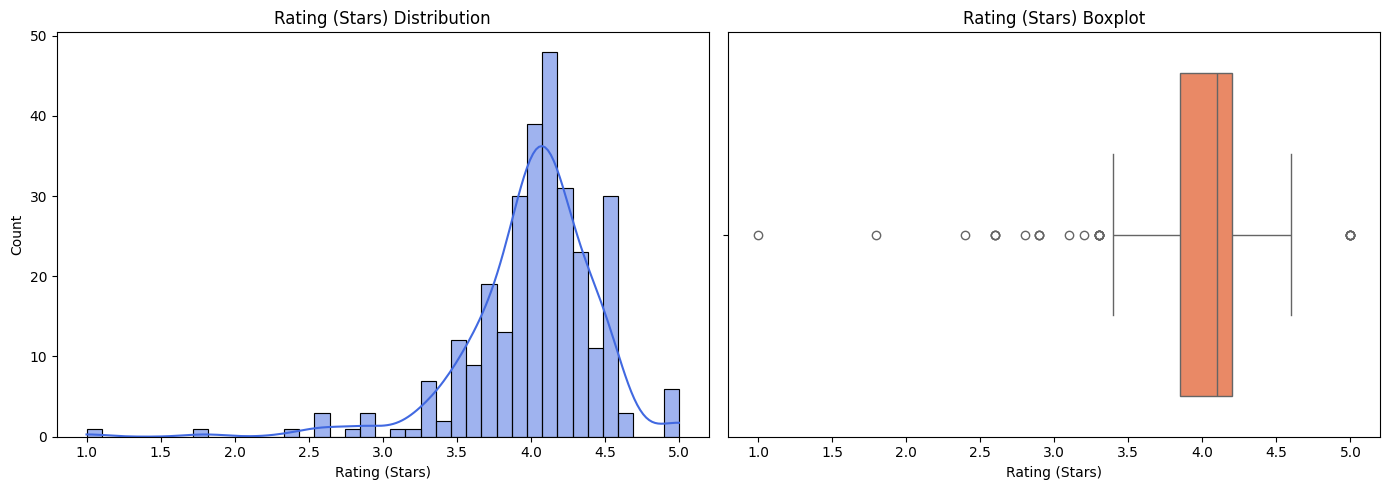

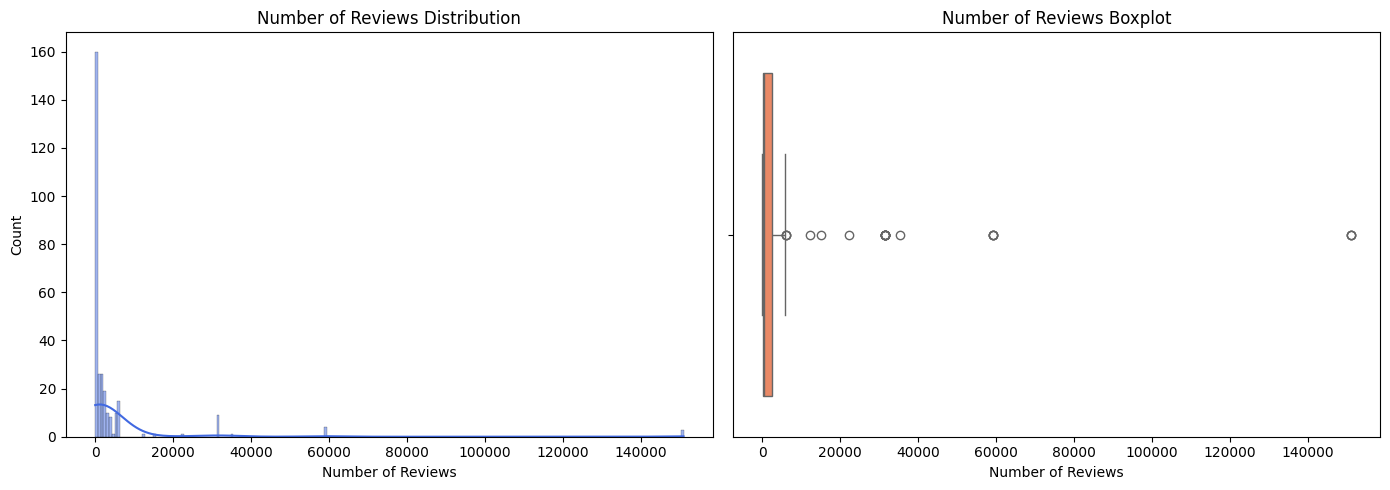

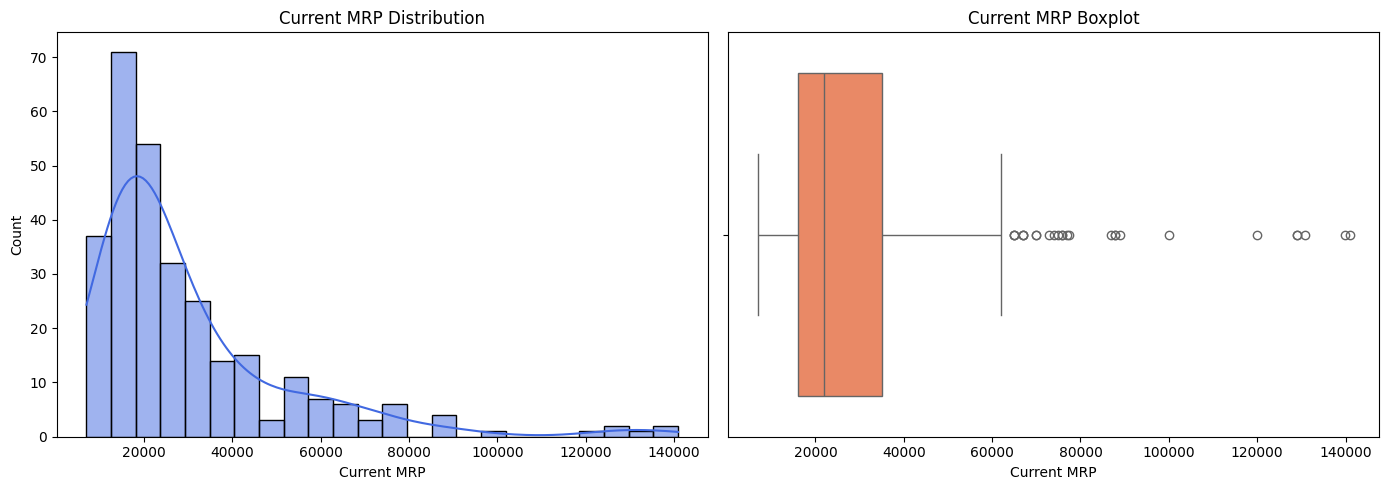

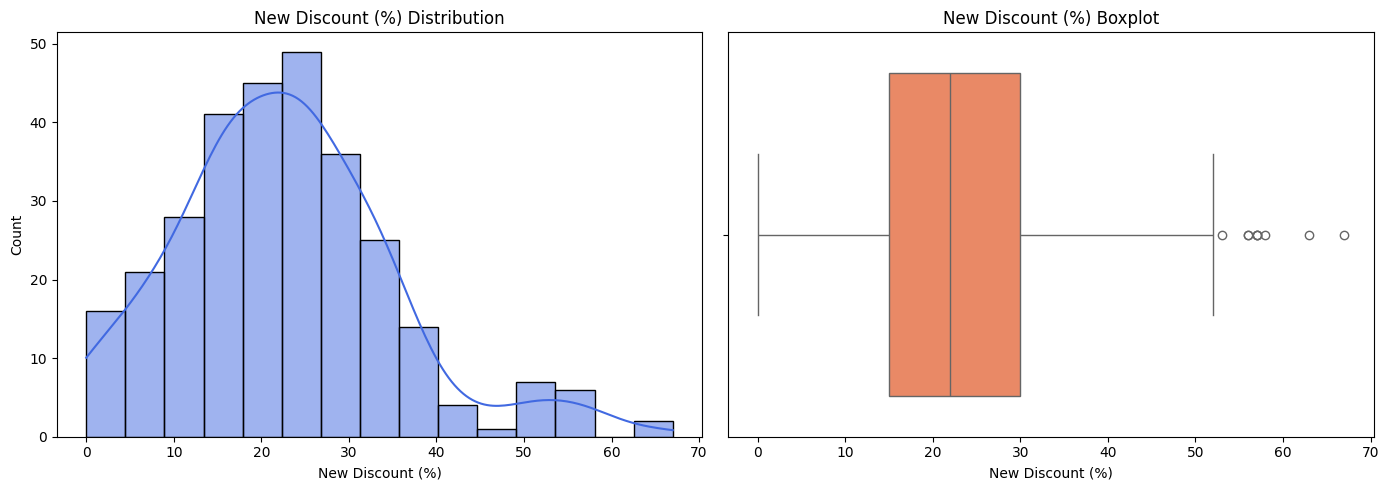

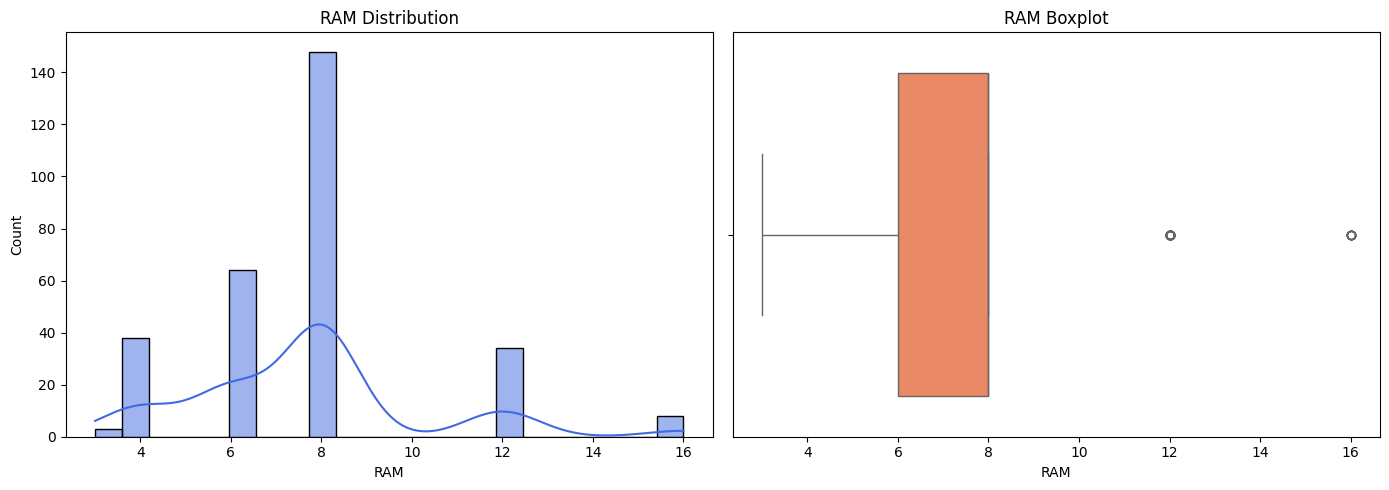

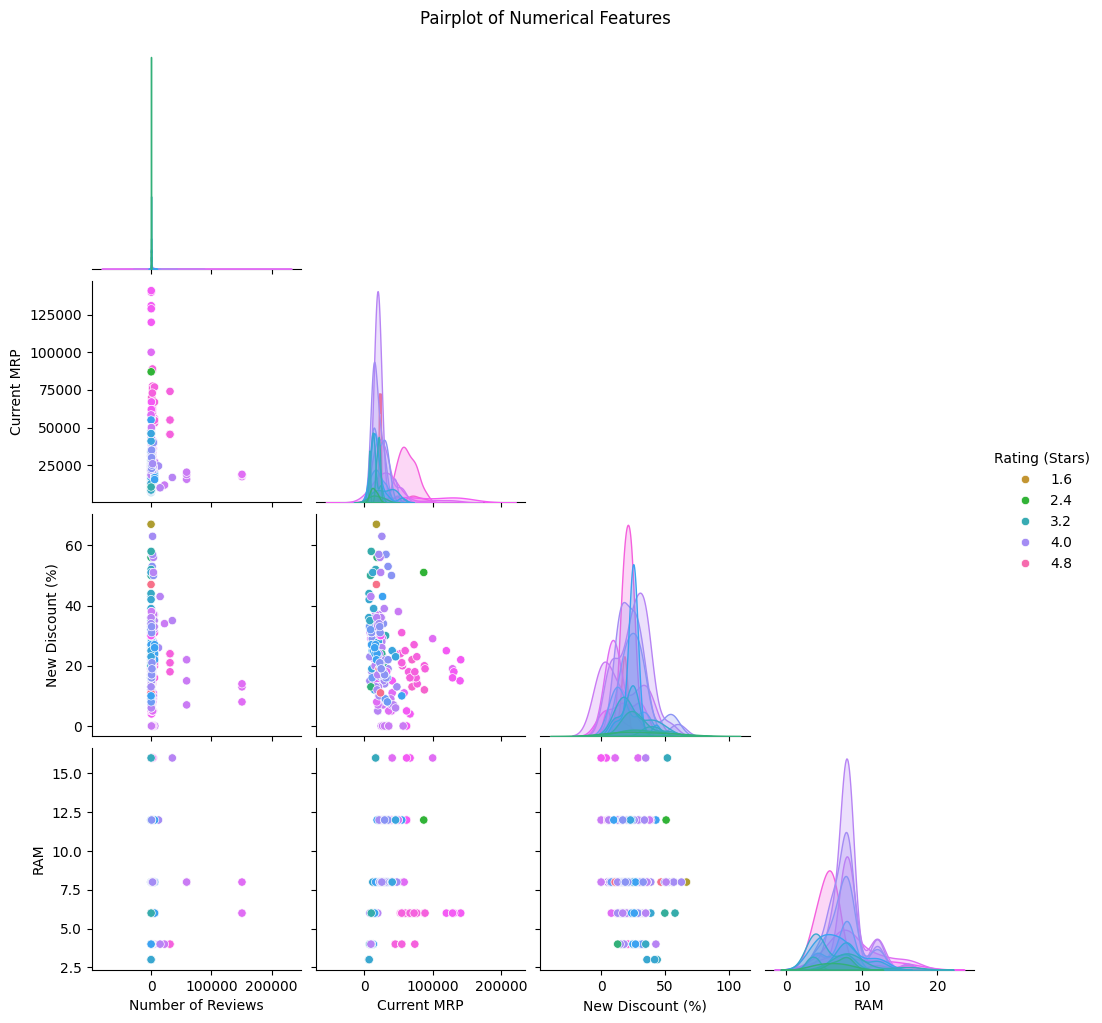

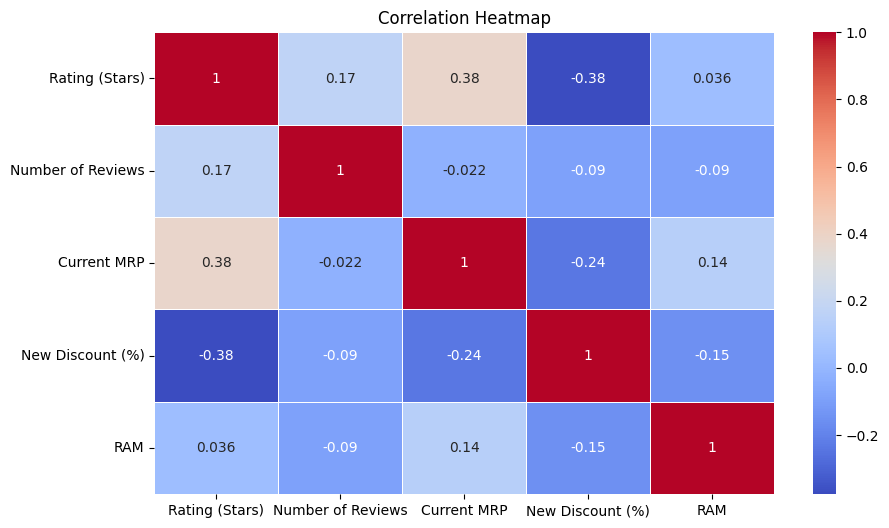

C:\Users\Dell\AppData\Local\Temp\ipykernel_35340\3835935191.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Brand', palette='Spectral')


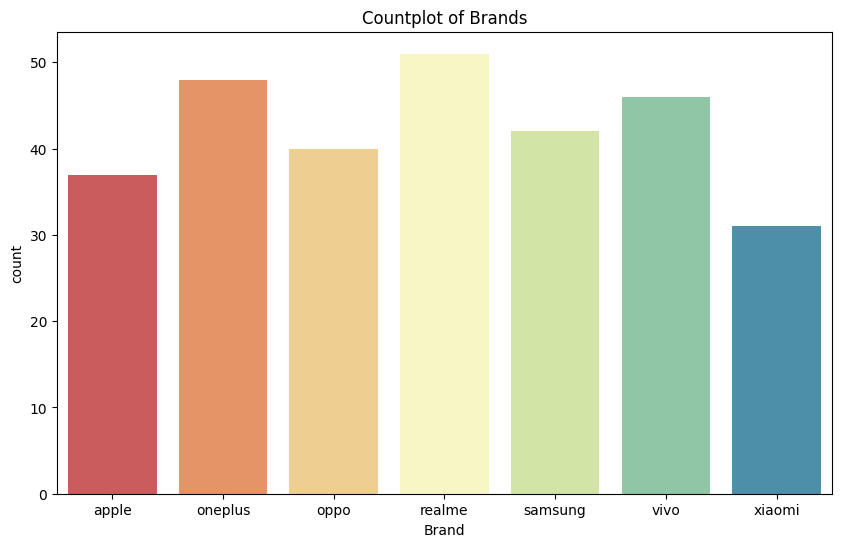

C:\Users\Dell\AppData\Local\Temp\ipykernel_35340\3835935191.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Color', palette='cubehelix')


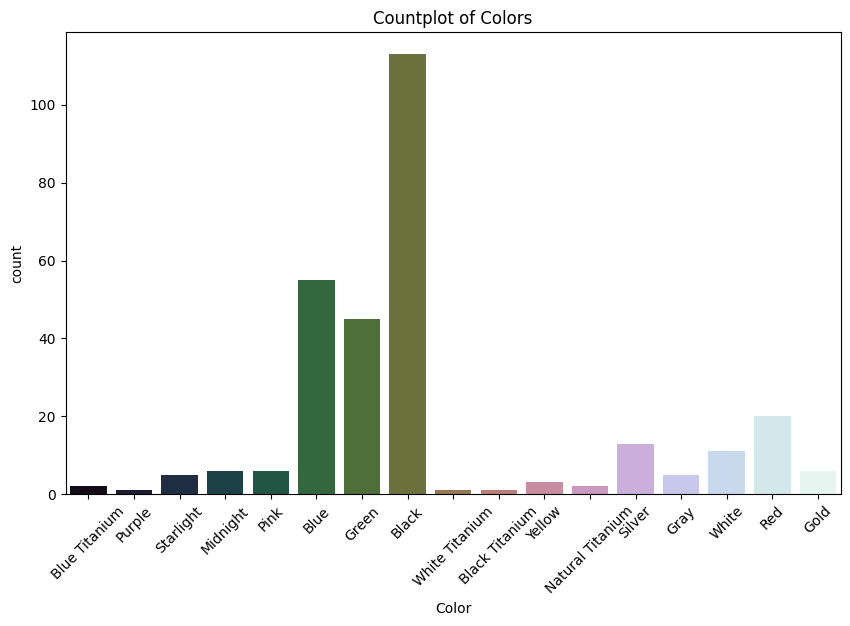

C:\Users\Dell\AppData\Local\Temp\ipykernel_35340\3835935191.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Current MRP', data=df, palette='viridis')


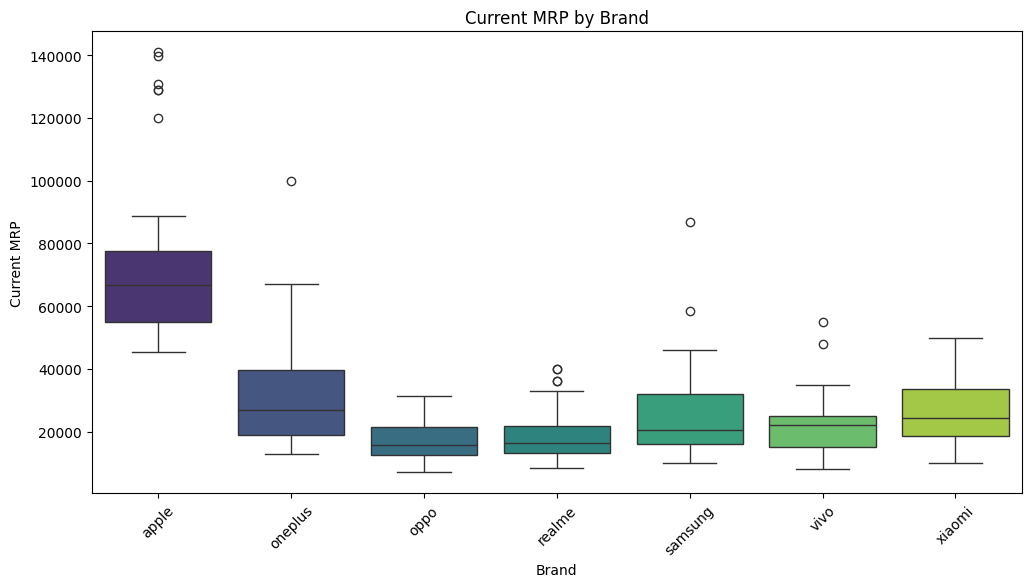

In [11]:
# --- Univariate Analysis ---
# Plotting histograms and boxplots for each numerical feature
numerical_features = ['Rating (Stars)', 'Number of Reviews', 'Current MRP', 'New Discount (%)', 'RAM']

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0], color='royalblue')
    axes[0].set_title(f'{feature} Distribution')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1], color='coral')
    axes[1].set_title(f'{feature} Boxplot')
    
    plt.tight_layout()
    plt.show()

# --- Multivariate Analysis ---
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features], hue='Rating (Stars)', palette='husl', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# --- Categorical Analysis ---
# Countplot for brands
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand', palette='Spectral')
plt.title('Countplot of Brands')
plt.show()

# Countplot for color distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Color', palette='cubehelix')
plt.title('Countplot of Colors')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Current MRP by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Current MRP', data=df, palette='viridis')
plt.title('Current MRP by Brand')
plt.xticks(rotation=45)
plt.show()

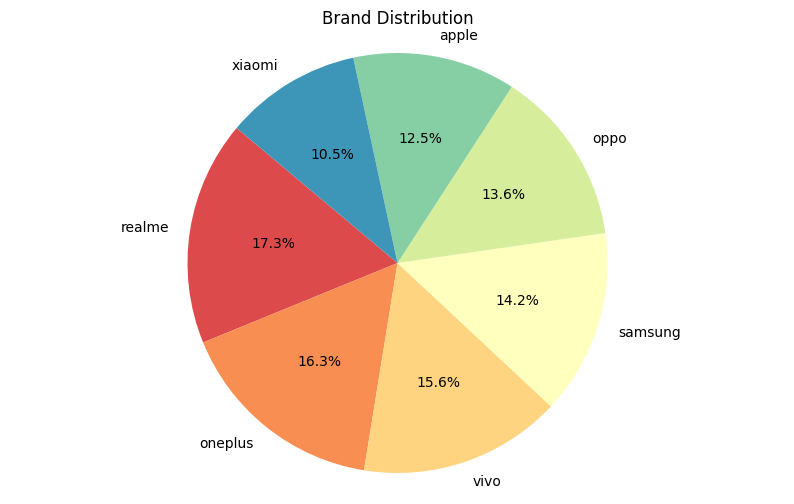

In [18]:
# --- Pie Chart for Brand Distribution ---
plt.figure(figsize=(10, 6))
brand_counts = df['Brand'].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral', len(brand_counts)))
plt.title('Brand Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

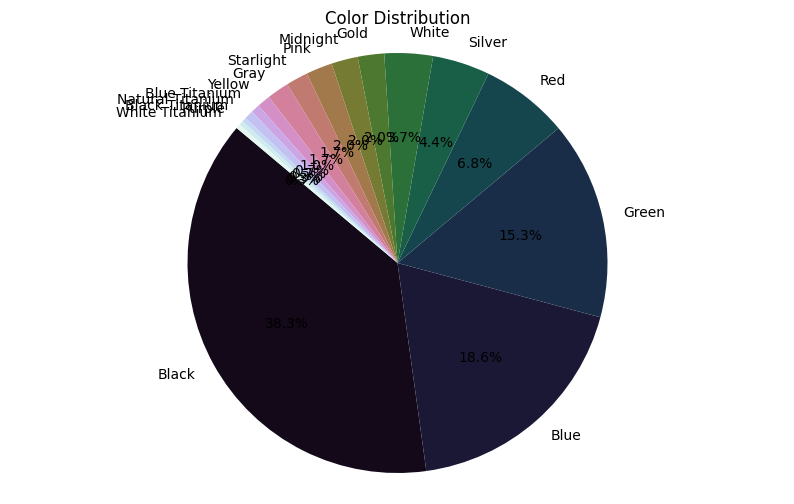

In [19]:
# --- Pie Chart for Color Distribution ---
plt.figure(figsize=(10, 6))
color_counts = df['Color'].value_counts()
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cubehelix', len(color_counts)))
plt.title('Color Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**OUTLIER**

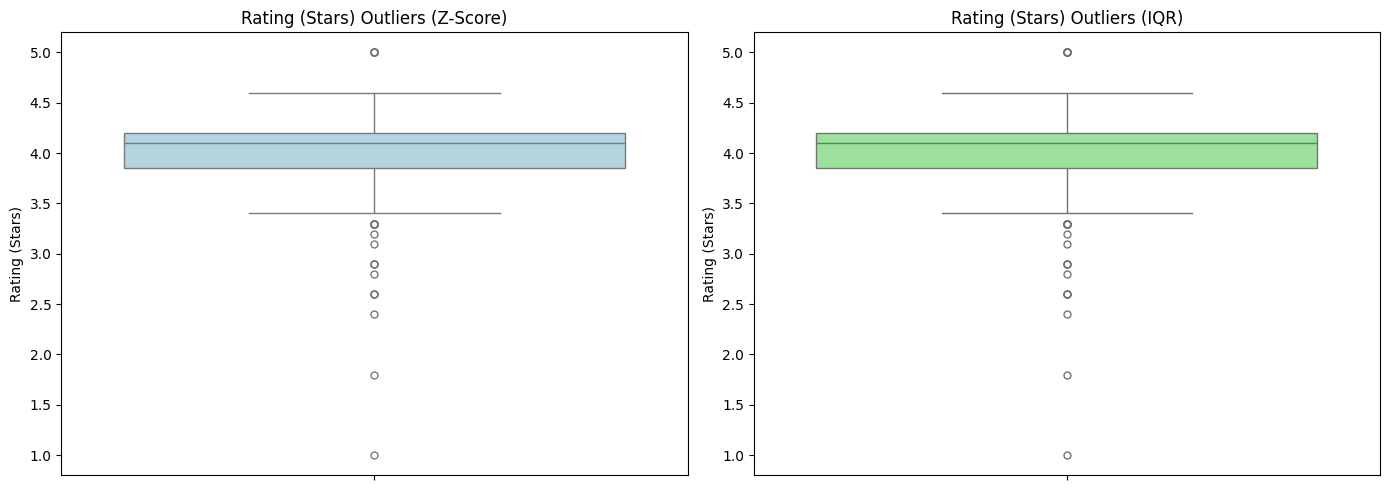

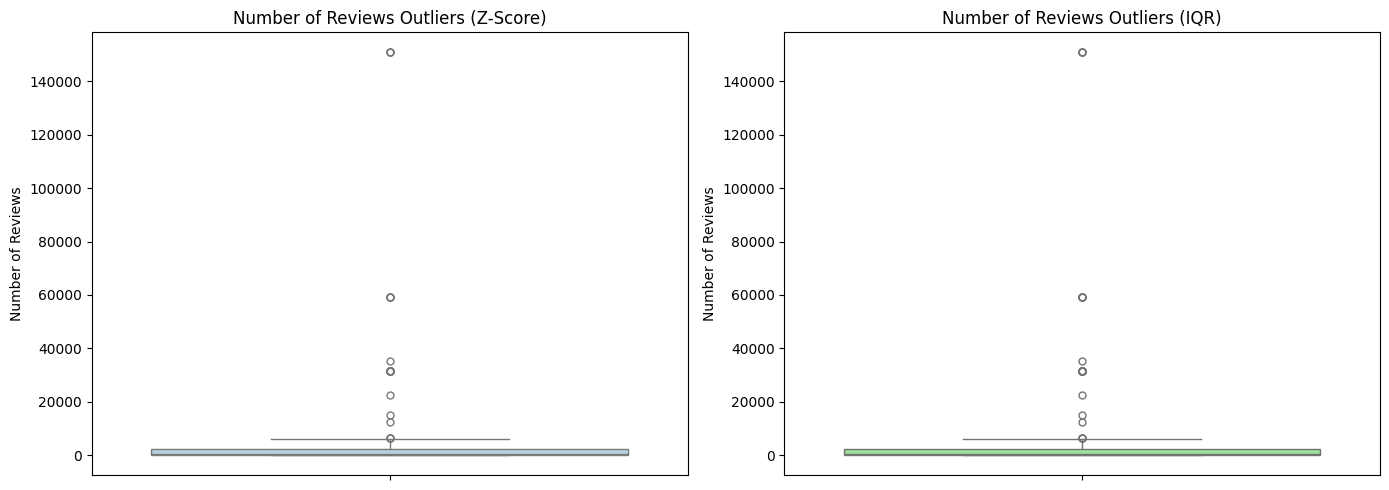

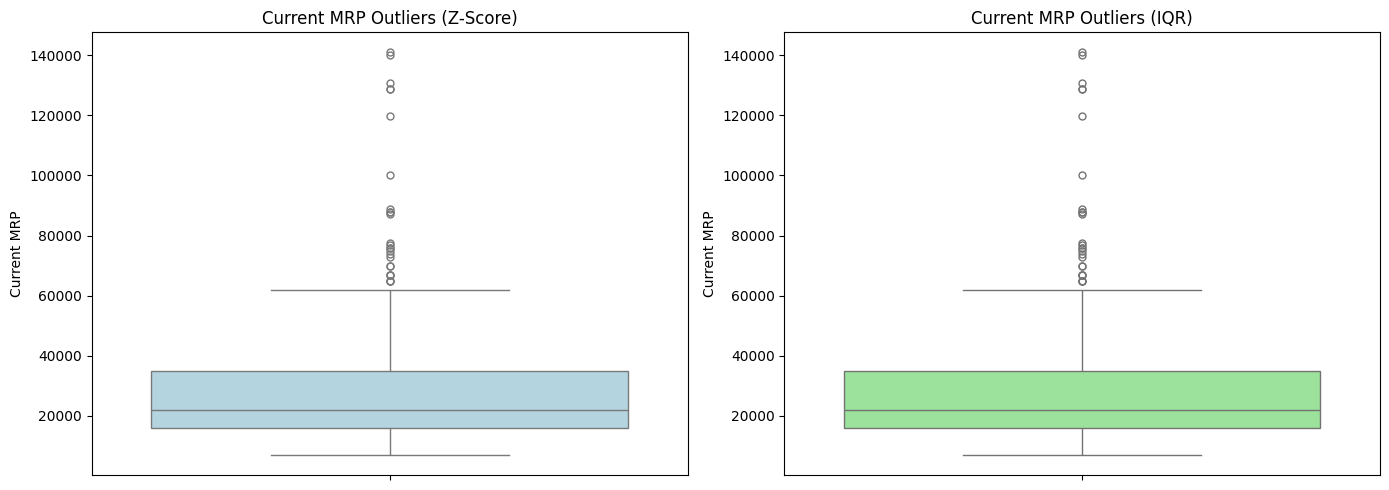

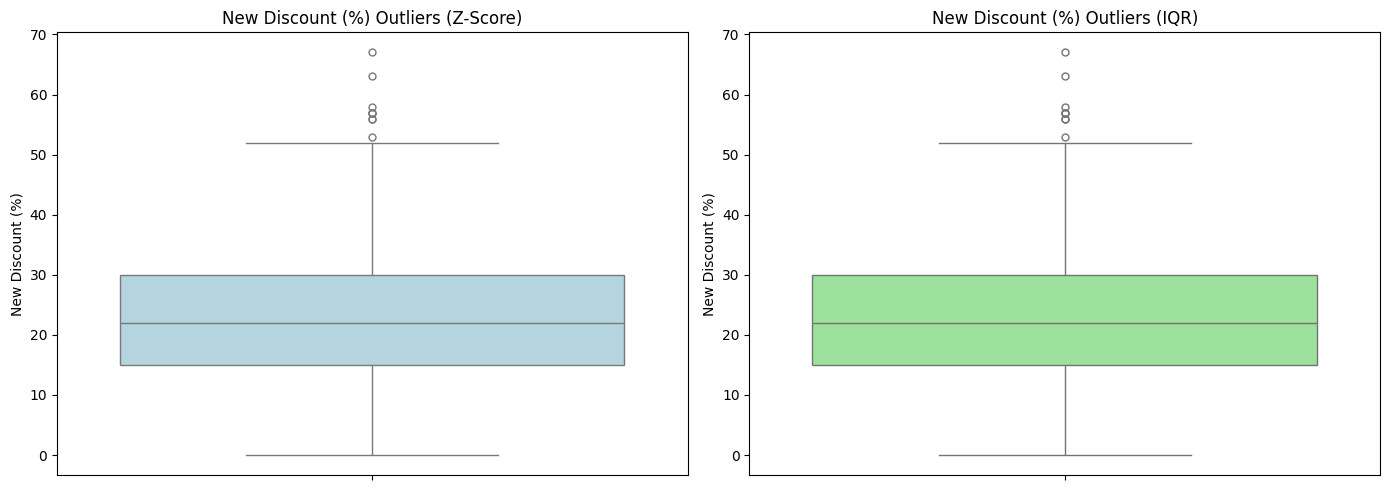

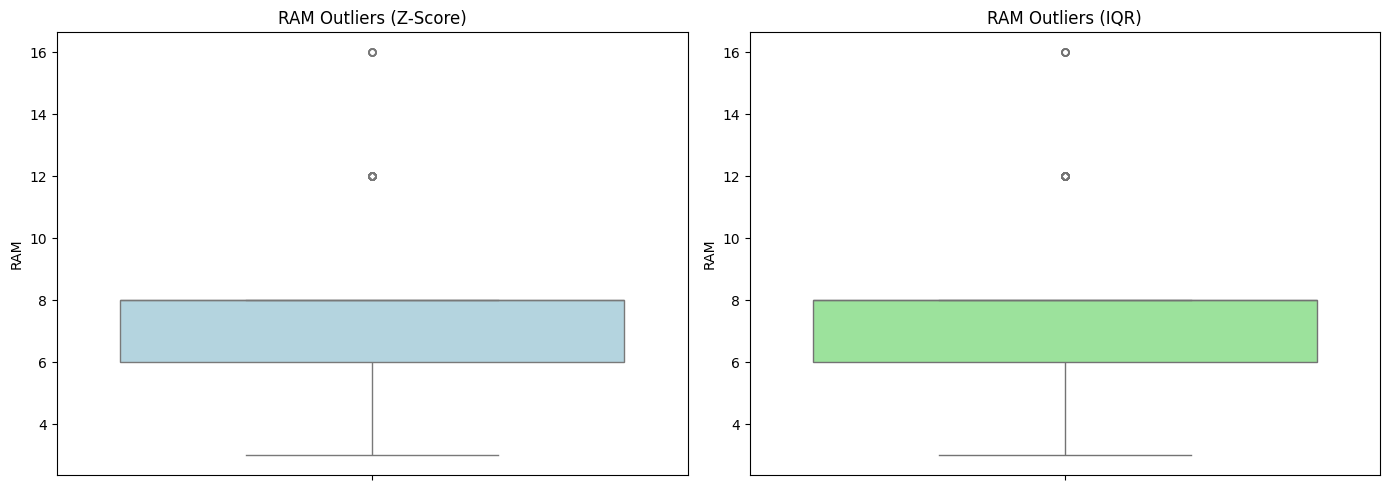

Outliers Detected using Z-score:


,Rating (Stars),Number of Reviews,Current MRP,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Outlier_Z
0,4.4,363.0,139900.0,0,apple,512.0,Blue Titanium,0,164900.0,15.0,6.0,True
10,4.4,306.0,119900.0,0,apple,256.0,White Titanium,200,159900.0,25.0,6.0,True
23,4.3,76.0,128900.0,0,apple,256.0,Black Titanium,50,159900.0,19.0,6.0,True
24,4.5,2431.0,87900.0,0,apple,512.0,Yellow,0,109900.0,20.0,6.0,True
26,4.4,306.0,140900.0,0,apple,512.0,Natural Titanium,0,179900.0,22.0,6.0,True
27,4.4,306.0,130900.0,1,apple,256.0,Blue Titanium,0,159900.0,18.0,6.0,True
31,4.4,306.0,128900.0,1,apple,256.0,Natural Titanium,0,154000.0,16.0,6.0,True
32,4.5,5729.0,76900.0,1,apple,512.0,Starlight,0,99900.0,23.0,6.0,True
33,4.5,2431.0,88900.0,1,apple,512.0,Black,0,109900.0,19.0,6.0,True
34,4.5,31459.0,73999.0,1,apple,512.0,Midnight,0,89900.0,18.0,4.0,True


Outliers Detected using IQR:


,Rating (Stars),Number of Reviews,Current MRP,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Outlier_IQR
0,4.4,363.0,139900.0,0,apple,512.0,Blue Titanium,0,164900.0,15.0,6.0,True
2,4.5,31459.0,45490.0,0,apple,128.0,Starlight,1000,59900.0,24.0,4.0,True
3,4.5,31459.0,45490.0,0,apple,128.0,Midnight,1000,59600.0,24.0,4.0,True
4,4.5,31459.0,45490.0,0,apple,128.0,Pink,500,59900.0,24.0,4.0,True
5,4.5,31459.0,45490.0,0,apple,128.0,Blue,500,59600.0,24.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
287,3.9,926.0,34999.0,1,xiaomi,512.0,Blue,50,44999.0,22.0,12.0,True
288,3.6,45.0,45999.0,1,xiaomi,512.0,Blue,0,59999.0,23.0,12.0,True
289,3.9,926.0,29999.0,0,xiaomi,256.0,Black,50,35999.0,17.0,12.0,True
290,3.1,129.0,10499.0,0,xiaomi,128.0,Black,0,24999.0,58.0,6.0,True


In [15]:
import numpy as np
from scipy import stats
from IPython.display import display

# --- Function to Detect Outliers using Z-Score ---
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers based on Z-score.
    Returns a DataFrame with an additional 'Outlier_Z' column.
    """
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    outliers = (z_scores > threshold).any(axis=1)
    return data.assign(Outlier_Z=outliers)

# --- Function to Detect Outliers using IQR ---
def detect_outliers_iqr(data):
    """
    Detect outliers based on IQR.
    Returns a DataFrame with an additional 'Outlier_IQR' column.
    """
    numerical_data = data.select_dtypes(include=[np.number])
    Q1 = numerical_data.quantile(0.25)
    Q3 = numerical_data.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data.assign(Outlier_IQR=is_outlier)

# Detect outliers using both methods
df_zscore_outliers = detect_outliers_zscore(df)
df_iqr_outliers = detect_outliers_iqr(df)

# --- Box Plots with Outliers Highlighted ---
numerical_features = ['Rating (Stars)', 'Number of Reviews', 'Current MRP', 'New Discount (%)', 'RAM']

# Plotting box plots for Z-score and IQR Outlier Detection
for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Box plot highlighting Z-score detected outliers
    sns.boxplot(
        y=df_zscore_outliers[feature],
        ax=axes[0],
        color='lightblue',
        fliersize=5,
        flierprops={'marker': 'o', 'color': 'red'}
    )
    axes[0].set_title(f'{feature} Outliers (Z-Score)')

    # Box plot highlighting IQR detected outliers
    sns.boxplot(
        y=df_iqr_outliers[feature],
        ax=axes[1],
        color='lightgreen',
        fliersize=5,
        flierprops={'marker': 'o', 'color': 'purple'}
    )
    axes[1].set_title(f'{feature} Outliers (IQR)')
    
    plt.tight_layout()
    plt.show()

# --- Optional: Print Outliers ---
print("Outliers Detected using Z-score:")
display(df_zscore_outliers[df_zscore_outliers['Outlier_Z'] == True])

print("Outliers Detected using IQR:")
display(df_iqr_outliers[df_iqr_outliers['Outlier_IQR'] == True])


In [17]:
df.dtypes

Rating (Stars)           float64
Number of Reviews        float64
Current MRP              float64
Free Delivery              int64
Brand                     object
Storage                  float64
Color                     object
New Bought Last Month      int64
New Dashed MRP           float64
New Discount (%)         float64
RAM                      float64
dtype: object